In [1]:
cd E:/GitHub/computervision

E:\GitHub\computervision


In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
model = 'vit'
# model_date = '2024-11-06 10-03-35'
# model_date = '2024-10-31 15-53-02'
# model_date = '2024-03-28 23-01-41'
model_date = '2024-11-16 16-58-16'

plot_dir = 'data/plot'
plot_dir = os.path.join(plot_dir, model)
plot_dir = os.path.join(plot_dir, model_date)

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

stats_dir = f'notebooks/{model}/models/{model_date}/stats'

In [4]:
class EpochStatistics:
    def __init__(self,df,epoch) -> None:
        self.df = df
        self.epoch = epoch
        
        df = df[df.epoch == epoch]
        
        self.tp = df.cls_0_corr.sum()
        self.tn = df.cls_1_corr.sum()
        self.fn = df.cls_0_total.sum() - self.tp
        self.fp = df.cls_1_total.sum() - self.tn
        
        self.accuracy = (self.tp + self.tn)/(self.tp + self.tn + self.fn + self.fp)
        self.precision = (self.tp)/(self.tp + self.fp)
        self.recall = (self.tp)/(self.tp + self.fn)
        self.recall_neg = (self.tn)/(self.tn + self.fp)
        
    def print_conf_mat(self):
        print(f"Epoch {self.epoch} Confusion matrix")
        print(f"{self.tp}  {self.fn}\n{self.fp}  {self.tn}")
        print('')
    def print_metrics(self):
        print(f"Epoch {self.epoch} metrics")
        print(f"Accuracy   = {self.accuracy}\nPrecision  = {self.precision}\nRecall     = {self.recall}\nRecall Neg = {self.recall_neg}")
        print('')
        

In [5]:
df_loss = pd.read_csv(stats_dir+'/acc_loss.csv')
df_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   epoch       45 non-null     int64  
 1   train_acc   45 non-null     float64
 2   train_loss  45 non-null     float64
 3   val_acc     45 non-null     float64
 4   val_loss    45 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.9 KB


In [6]:
idx = df_loss.val_loss.idxmin()
epoch_lower_loss = df_loss.loc[idx, 'epoch']
eval_epoch = epoch_lower_loss
eval_epoch

35

## Metrics by Camera Code

In [7]:
df = pd.read_csv(stats_dir+'/cam_acc.csv')

In [8]:
df['FN'] = df['cls_0_total'] - df['cls_0_corr']
df['FP'] = df['cls_1_total'] - df['cls_1_corr']        
df['ACC'] = (df['cls_0_corr']+df['cls_1_corr'])/(df['cls_0_corr']+df['cls_1_corr']+df['FP']+df['FN'])
df['PREC'] = (df['cls_1_corr'])/(df['cls_1_corr'] + df['FP'])
df['REC'] = (df['cls_1_corr'])/(df['cls_1_corr'] + df['FN'])

In [9]:
df.sort_values(['ACC'])

,epoch,code,cls_0_corr,cls_0_total,cls_1_corr,cls_1_total,FN,FP,ACC,PREC,REC
14,1,CODE365,8,66,2,54,58,52,0.083333,0.037037,0.033333
31,2,CODE365,12,64,8,56,52,48,0.166667,0.142857,0.133333
1,1,CODE310,28,84,4,36,56,32,0.266667,0.111111,0.066667
18,2,CODE310,36,92,4,28,56,24,0.333333,0.142857,0.066667
35,3,CODE310,42,94,8,26,52,18,0.416667,0.307692,0.133333
...,...,...,...,...,...,...,...,...,...,...,...
719,43,CODE261,60,60,60,60,0,0,1.000000,1.000000,1.000000
498,30,CODE261,60,60,60,60,0,0,1.000000,1.000000,1.000000
294,18,CODE261,60,60,60,60,0,0,1.000000,1.000000,1.000000
566,34,CODE261,60,60,60,60,0,0,1.000000,1.000000,1.000000


In [18]:
aggreg = {
    'ACC':'mean',
    'PREC':'mean',
    'REC':'mean'
}
group_cam = df[['code','ACC','PREC','REC']].groupby(['code'], as_index=False).agg(aggreg)
group_cam

,code,ACC,PREC,REC
0,CODE1138,0.877407,0.862880,0.900000
1,CODE1403,0.945556,1.000000,0.891111
2,CODE1404,0.832222,0.778994,0.927407
3,CODE1405,0.750000,0.685279,0.935556
4,CODE1525,0.697407,0.693466,0.645185
5,CODE1635,0.711852,0.931598,0.457037
6,CODE1648,0.930741,0.956537,0.904444
7,CODE1649,0.834815,0.884925,0.769630
8,CODE1671,0.580370,0.994444,0.161481
9,CODE1881,0.664444,0.607771,0.922222


In [10]:
cam_stats = EpochStatistics(df,eval_epoch)
cam_stats.print_conf_mat()
cam_stats.print_metrics()

Epoch 35 Confusion matrix
812  244
208  776

Epoch 35 metrics
Accuracy   = 0.7784313725490196
Precision  = 0.796078431372549
Recall     = 0.7689393939393939
Recall Neg = 0.7886178861788617



## Metrics by Time of Day

## 

In [11]:
dn_df = pd.read_csv(stats_dir+'/day_night_acc.csv')

In [12]:
dn_df['FN'] = dn_df['cls_0_total'] - dn_df['cls_0_corr']
dn_df['FP'] = dn_df['cls_1_total'] - dn_df['cls_1_corr']
dn_df['ACC'] = (dn_df['cls_0_corr']+dn_df['cls_1_corr'])/(dn_df['cls_0_corr']+dn_df['cls_1_corr']+dn_df['FP']+dn_df['FN'])
dn_df['PREC'] = (dn_df['cls_1_corr'])/(dn_df['cls_1_corr'] + dn_df['FP'])
dn_df['REC'] = (dn_df['cls_1_corr'])/(dn_df['cls_1_corr'] + dn_df['FN'])

In [13]:
dn_df.sort_values(['ACC'],ascending=False)

,epoch,time,cls_0_corr,cls_0_total,cls_1_corr,cls_1_total,FN,FP,ACC,PREC,REC
6,4,day,318,374,124,172,56,48,0.809524,0.720930,0.688889
74,38,day,314,368,126,178,54,52,0.805861,0.707865,0.700000
44,23,day,314,368,126,178,54,52,0.805861,0.707865,0.700000
30,16,day,314,368,126,178,54,52,0.805861,0.707865,0.700000
32,17,day,314,368,126,178,54,52,0.805861,0.707865,0.700000
...,...,...,...,...,...,...,...,...,...,...,...
7,4,night,494,742,592,752,248,160,0.726908,0.787234,0.704762
5,3,night,488,784,544,710,296,166,0.690763,0.766197,0.647619
0,1,day,270,356,94,190,86,96,0.666667,0.494737,0.522222
3,2,night,476,832,484,662,356,178,0.642570,0.731118,0.576190


In [15]:
aggreg = {
    'ACC':'mean',
    'PREC':'mean',
    'REC':'mean'
}
group_daynight = dn_df[['time','ACC','PREC','REC']].groupby(['time'], as_index=False).agg(aggreg)
group_daynight

,time,ACC,PREC,REC
0,day,0.801709,0.701757,0.693827
1,night,0.757965,0.799689,0.758201


In [ ]:
dn_stats = EpochStatistics(dn_df,eval_epoch)
dn_stats.print_conf_mat()
dn_stats.print_metrics()

Epoch 35 Confusion matrix
812  244
208  776

Epoch 35 metrics
Accuracy   = 0.7784313725490196
Precision  = 0.796078431372549
Recall     = 0.7689393939393939
Recall Neg = 0.7886178861788617



## General Statistics

In [ ]:
df_cm = pd.read_csv(stats_dir+'/conf_mat.csv')
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   epoch   45 non-null     int64
 1   TP      45 non-null     int64
 2   FN      45 non-null     int64
 3   FP      45 non-null     int64
 4   TN      45 non-null     int64
dtypes: int64(5)
memory usage: 1.9 KB


In [ ]:
df_cm['ACC'] = (df_cm.TP + df_cm.TN)/(df_cm.TP + df_cm.TN + df_cm.FP + df_cm.FN)
df_cm['PREC'] = df_cm.TP/(df_cm.TP + df_cm.FP)
df_cm['REC'] = df_cm.TP/(df_cm.TP + df_cm.FN)
df_cm['REC_NEG'] = df_cm.TN/(df_cm.TN + df_cm.FP)

In [ ]:
df_cm = df_cm[df_cm.epoch == df_cm.epoch.max()]

In [ ]:
tp = df_cm.TP.values[0]
fn = df_cm.FN.values[0]
fp = df_cm.FP.values[0]
tn = df_cm.TN.values[0]
print(f"{tp}  {fn}\n{fp}  {tn}")

406  104
122  388


In [ ]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)
recall_neg = (tn)/(tn+fp)
print(f"Accuracy   = {accuracy}\nPrecision  = {precision}\nRecall     = {recall}\nRecall Neg = {recall_neg}")

Accuracy   = 0.7784313725490196
Precision  = 0.7689393939393939
Recall     = 0.796078431372549
Recall Neg = 0.7607843137254902


In [ ]:
df_acc_loss = pd.read_csv(stats_dir+'/acc_loss.csv')
df_acc_loss.head()

,epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.547526,0.700211,0.596078,0.669089
1,2,0.643691,0.635064,0.675490,0.617340
2,3,0.709839,0.590725,0.718627,0.578568
3,4,0.753474,0.552839,0.749020,0.551407
4,5,0.794330,0.517388,0.773529,0.527265


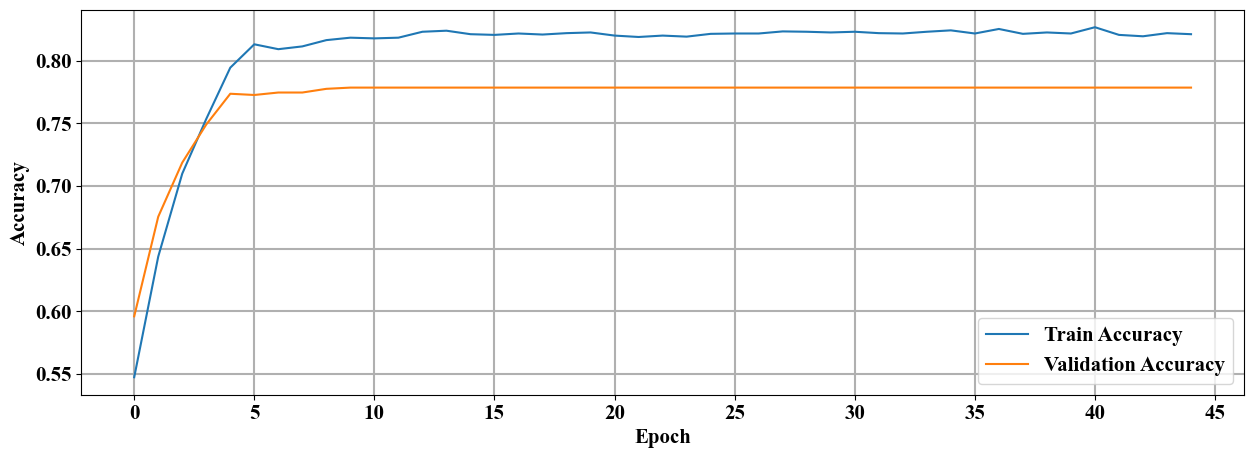

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['grid.linewidth'] = 1.5

plt.figure(figsize=(15,5))
plt.plot(df_acc_loss.train_acc.tolist(), label='Train Accuracy')
plt.plot(df_acc_loss.val_acc.tolist(), label='Validation Accuracy')
ylabel = plt.ylabel("Accuracy")
xlabel = plt.xlabel("Epoch")
# title = plt.title("Comparison Between Prediction & True Values")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig(os.path.join(plot_dir, "accuracy.png"))
plt.show()

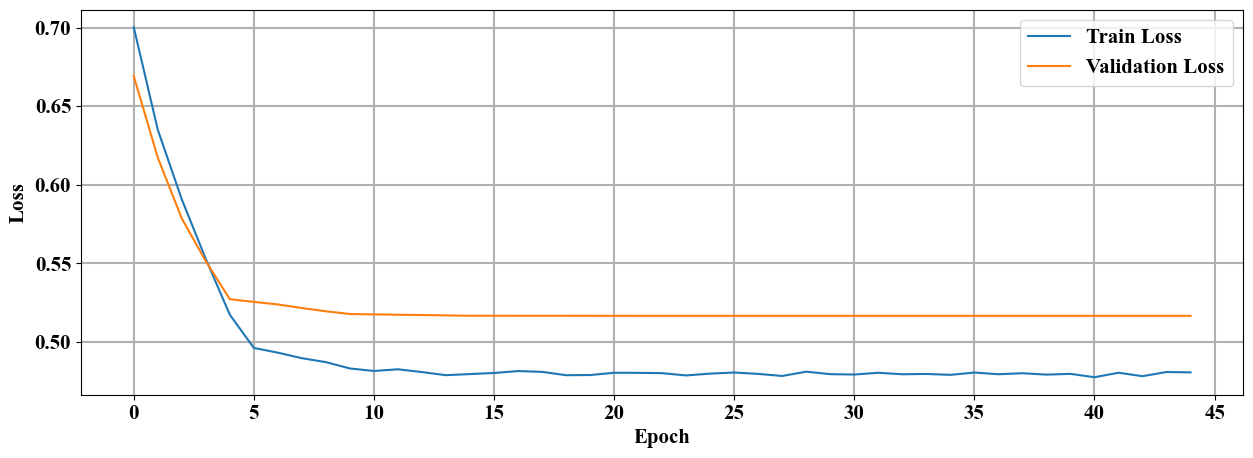

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['grid.linewidth'] = 1.5

plt.figure(figsize=(15,5))
plt.plot(df_acc_loss.train_loss.tolist(), label='Train Loss')
plt.plot(df_acc_loss.val_loss.tolist(), label='Validation Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
# plt.title("Comparison Between Prediction & True Values")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig(os.path.join(plot_dir, "loss.png"))
plt.show()

In [ ]:
# train_acc = [0.6722,
#              0.8187,
#              0.8865,
#              0.9255,
#              0.9478,
#              0.9647,
#              0.9805,
#              0.9850,
#              0.9880,
#              0.9896,
#              0.9962,
#              0.9967,
#              0.9977,
#              0.9984,
#              0.9986,
#              0.9984,
#              0.9979,
#              0.9986,
#              0.9993,
#              0.9993,
#              0.9991,
#              0.9991,
#              0.9995,
#              0.9991
#              ]

# val_acc = [0.7474,
#            0.7436,
#            0.5987,
#            0.7218,
#            0.8179,
#            0.8282,
#            0.8333,
#            0.7987,
#            0.7833,
#            0.8192,
#            0.8205,
#            0.8179,
#            0.8192,
#            0.8231,
#            0.8192,
#            0.8192,
#            0.8205,
#            0.8179,
#            0.8231,
#            0.8218,
#            0.8192,
#            0.8192,
#            0.8192,
#            0.8231
#            ]

# print(len(train_acc))
# print(len(val_acc))

# plt.figure(figsize=(15,5))
# plt.plot(train_acc[:20], label='Train Accuracy')
# plt.plot(val_acc[:20], label='Validation Accuracy')
# plt.ylabel("Accuracy")
# plt.xlabel("Epoch")
# # plt.title("Comparison Between Prediction & True Values")
# plt.legend()
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.savefig(os.path.join(plot_dir, "accuracy.png"))
# plt.show()

In [ ]:
# train_loss = [
#     0.6058,
#     0.4297,
#     0.2959,
#     0.2045,
#     0.1478,
#     0.1123,
#     0.0684,
#     0.0538,
#     0.0417,
#     0.0351,
#     0.0163,
#     0.0130,
#     0.0108,
#     0.0096,
#     0.0090,
#     0.0082,
#     0.0086,
#     0.0076,
#     0.0069,
#     0.0065,
#     0.0064,
#     0.0062,
#     0.0059,
#     0.0063
# ]

# val_loss = [
#     0.5387,
#     0.5171,
#     1.0073,
#     0.5699,
#     0.4174,
#     0.3927,
#     0.3874,
#     0.5432,
#     0.6141,
#     0.5051,
#     0.5438,
#     0.5522,
#     0.5390,
#     0.5522,
#     0.5523,
#     0.5557,
#     0.5688,
#     0.5805,
#     0.5665,
#     0.5767,
#     0.5789,
#     0.5790,
#     0.5787,
#     0.5771
# ]
# print(len(train_loss))
# print(len(val_loss))

# plt.figure(figsize=(15,5))
# plt.plot(train_loss[:20], label='Train Loss')
# plt.plot(val_loss[:20], label='Validation Loss')
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# # plt.title("Comparison Between Prediction & True Values")
# plt.legend()
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.savefig(os.path.join(plot_dir, "loss.png"))
# plt.show()